In [1]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [2]:
x, y, z, T, t, settings = load_data("shape_res")
x = x[0]
y = y[0]
settings = settings[0]
print(len(z))
settings

3


{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((34.0, 39.2, 0.04), (14.2, 19.8, 0.04)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [27]:
x_bg, y_bg, z_bg, _, _, _ = load_data("shape_res_bg")
x_bg = x_bg[0]
y_bg = y_bg[0]
#z_bg = z_bg[0]
background = interpolate_background(x_bg, y_bg, z_bg[0][0], x, y)

In [30]:
zz = np.concatenate(z_bg)
noise_std = detrend2D(np.std(zz[:3], axis=0))

<IPython.core.display.Javascript object>


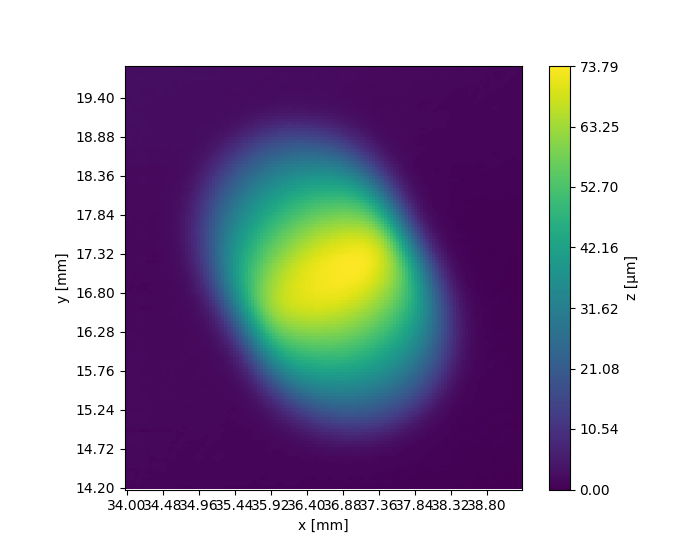

<IPython.core.display.Javascript object>


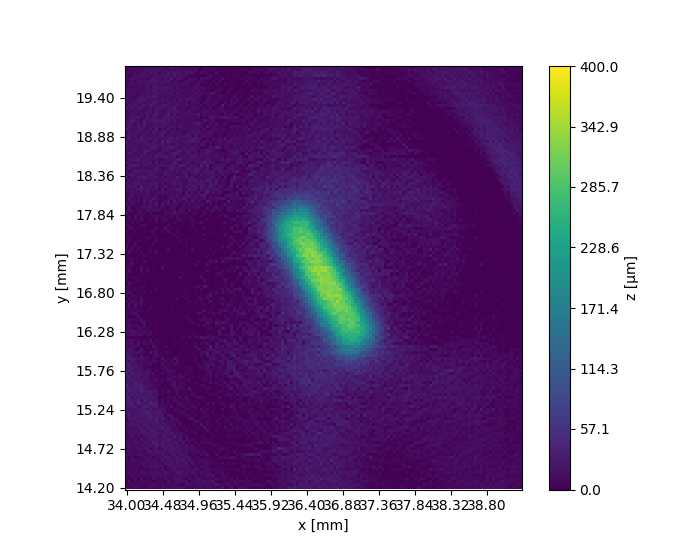

In [48]:
#plot(x, y, z_bg)

sensor = z[1][0]
signal = background - sensor
signal = detrend2D(signal)
signal -= signal.min()


noise = z[1][0] - z[-1][0]
noise = detrend2D(noise)
#noise2 = noise.copy()
#np.random.shuffle(noise.flat)

limits = (0, 400)

plot(x, y, signal)
#plot(x, y, noise)


diameter = 2.57
sigma = 0
factor = 1
theta=-1
phi=0
stepsize = settings['extent'][0][2]

e2 = 3 
dielf = 1 - (1 / e2)

kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, noise_std * 0.0008, 1, extra=6) / dielf

#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 2)

#fig, ax = plot(x, y, z_reconstructed)
fig, ax = plot(x, y, z_reconstructed, limits=limits, psf=None)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


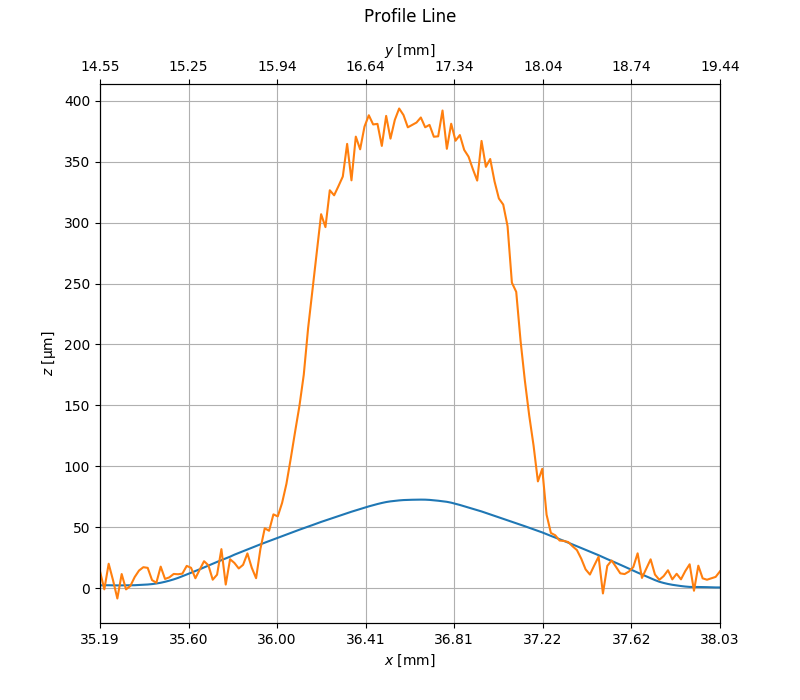

(<matplotlib.figure.Figure at 0x7f97afef3e48>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f97afdcbe10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f97b4096e80>))

In [46]:
plot_profile(x, y, [signal, z_reconstructed], *profile.coords)

In [40]:
profile.coords

[(35.136956906729615, 15.930014757969266),
 (38.373131641086097, 17.647984061393078)]